# <font color='blue'>E-Commerce Users Buying Propensity Algorithm</font>



Problem Definition:

In this Project, our work will be to evaluate which attributes influence a user when buying products online and build a predictive model to make predictions of future purchases.

We will use the dataset as a data source:

Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The dataset consists of feature vectors belonging to 12,330 online sessions. The dataset was formed so that each session belongs to a different user over a 1 year period to avoid any bias towards a specific campaign, special day, user, profile or period.

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

## Importing Packages

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## Load and Data Dictionary

In [2]:
# Loading the data
df_original = pd.read_csv('dados/online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data dictionary:

"Administrative", "Administrative duration", "Informational", "Informational duration", "Product related" and "Product related duration" represent the number of different types of pages visited by the visitor in that session and the total time spent on each one of these page categories. The values ​​for these features are derived from the URL information of pages visited by the user and updated in real time when a user performs an action, for example moving from one page to another.

The features "Bounce Rate", "Exit Rate" and "Page Value" represent the metrics measured by "Google Analytics" for each page on the eCommerce website.

The "Bounce Rate" resource value of a web page refers to the percentage of visitors who enter the site from that page and leave ("bounce") without triggering further requests to the server during that session.

The "Exit Rate" feature value for a specific webpage is calculated as the percentage that was last in the session, for all page-to-page views.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates how close your site visit time is to a specific special day (eg Mother's Day, Valentine's Day) where sessions are most likely to complete with the transaction. The value of this attribute is determined by considering e-commerce dynamics, such as the duration between order date and delivery date. For example, on Valentine's Day, this value assumes a nonzero value between February 2nd and February 12th (Valentine's Day in the US and Europe), zero before and after that date, unless it is close to another special day and its maximum value of 1 on February 8.

The dataset also includes the type of operating system, browser, region, type of traffic, type of visitor such as new or returning visitor, a boolean value indicating whether the date of visit is a weekend, and month of the year.

The target variable (Revenue) is Boolean, with True if the session generated revenue and False if it did not.

## Exploratory Analysis

In [3]:
# Shape
df_original.shape

(12330, 18)

In [4]:
# Data Types
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
# Checking for missing values
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [6]:
# Removing lines with missing values
df_original.dropna(inplace = True)

In [7]:
# Checking for missing values
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [8]:
# Shape
df_original.shape

(12316, 18)

In [9]:
# Checking for Unique Values
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

For visualization purposes, we will split the data into continuous and categorical variables. We will treat all variables with less than 30 unique entries as categorical.

In [10]:
# Preparing the data for the plot

# Create a copy of the original dataset
df = df_original.copy()

# Empty lists for results
continuous = []
categorical = []

# Loop through the columns
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [11]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [12]:
# Continuous variables
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [13]:
# Categorical variables
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


Graphs for numerical variables.

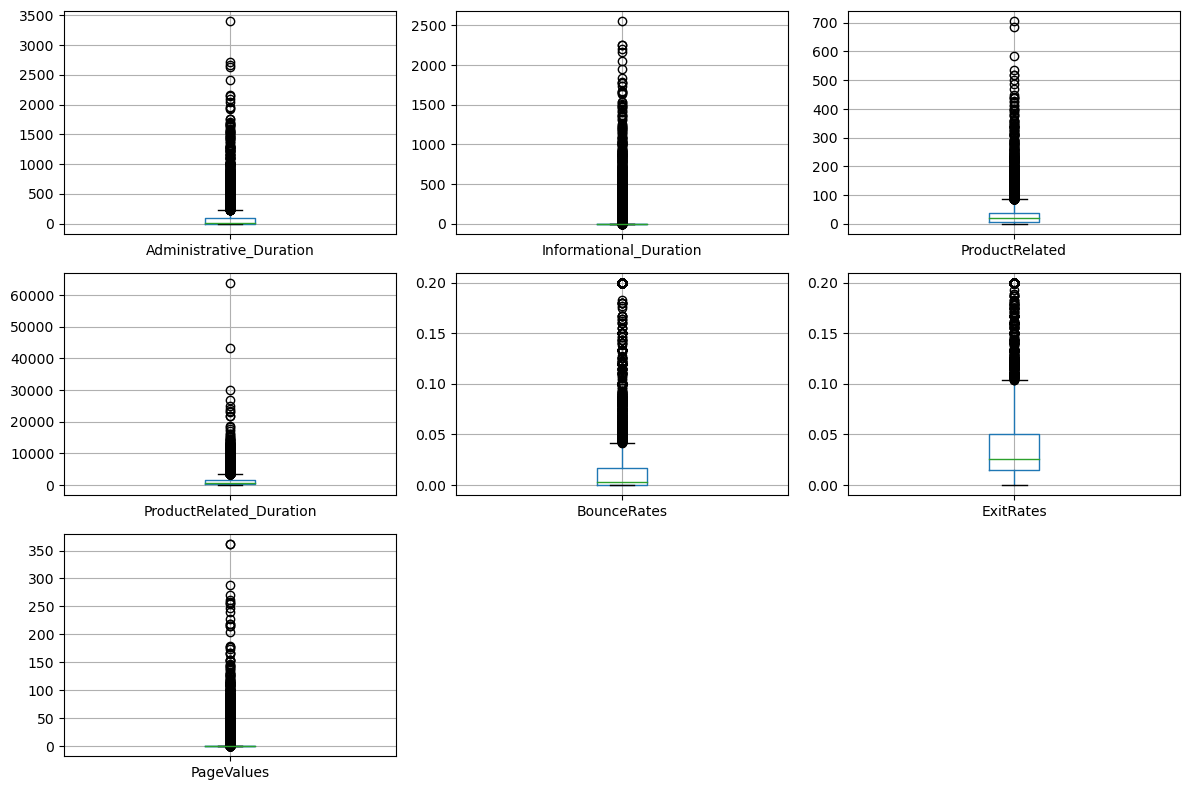

In [14]:
# Plot of continuous variables

# Plot area size
fig = plt.figure(figsize = (12,8))

# Loop through continuous variables
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()
    
plt.savefig('imagens/boxplot1.png')

Continuous variables look extremely skewed. Let's apply log transformation for better visualization.

In [15]:
# Log transformation on continuous variables
df[continuous] = np.log1p(1 + df[continuous])

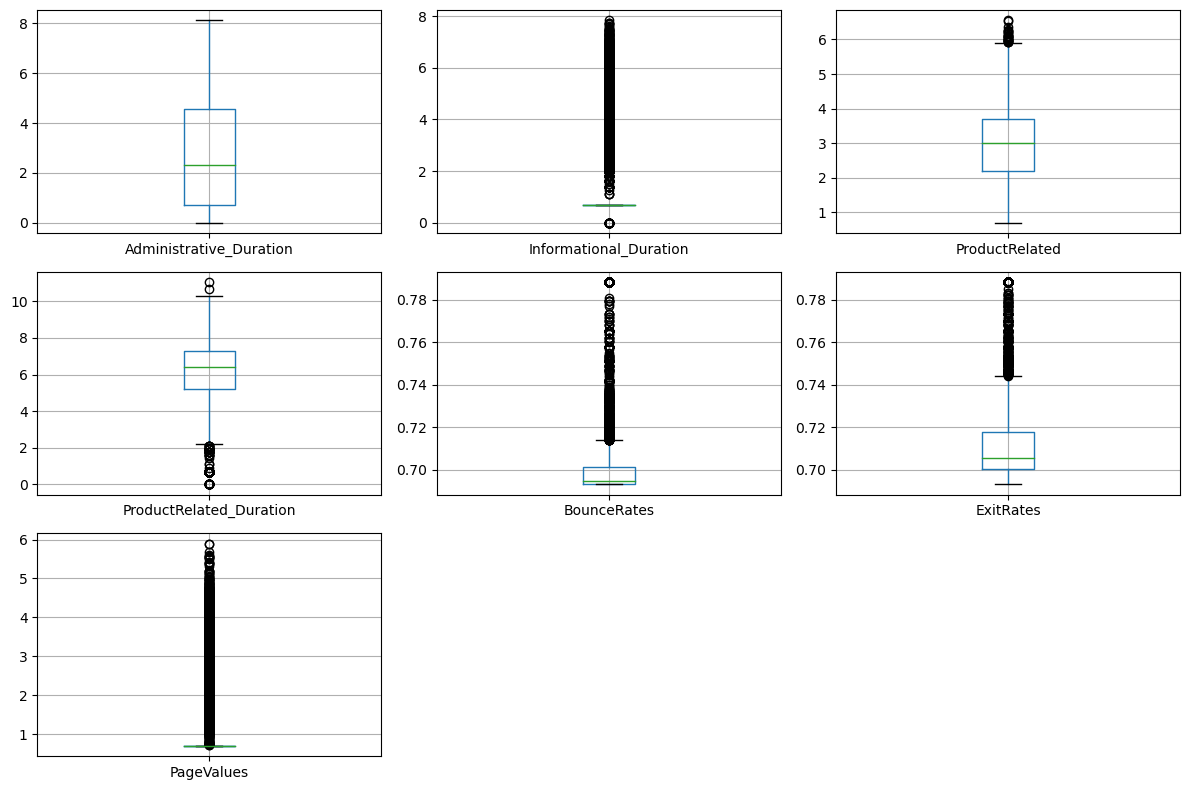

In [16]:
# Plot of continuous variables

# Plot area size
fig = plt.figure(figsize = (12,8))

# Loop through continuous variables
for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('imagens/boxplot2.png')

Correlation Matrix Between Continuous Variables.

<AxesSubplot:>

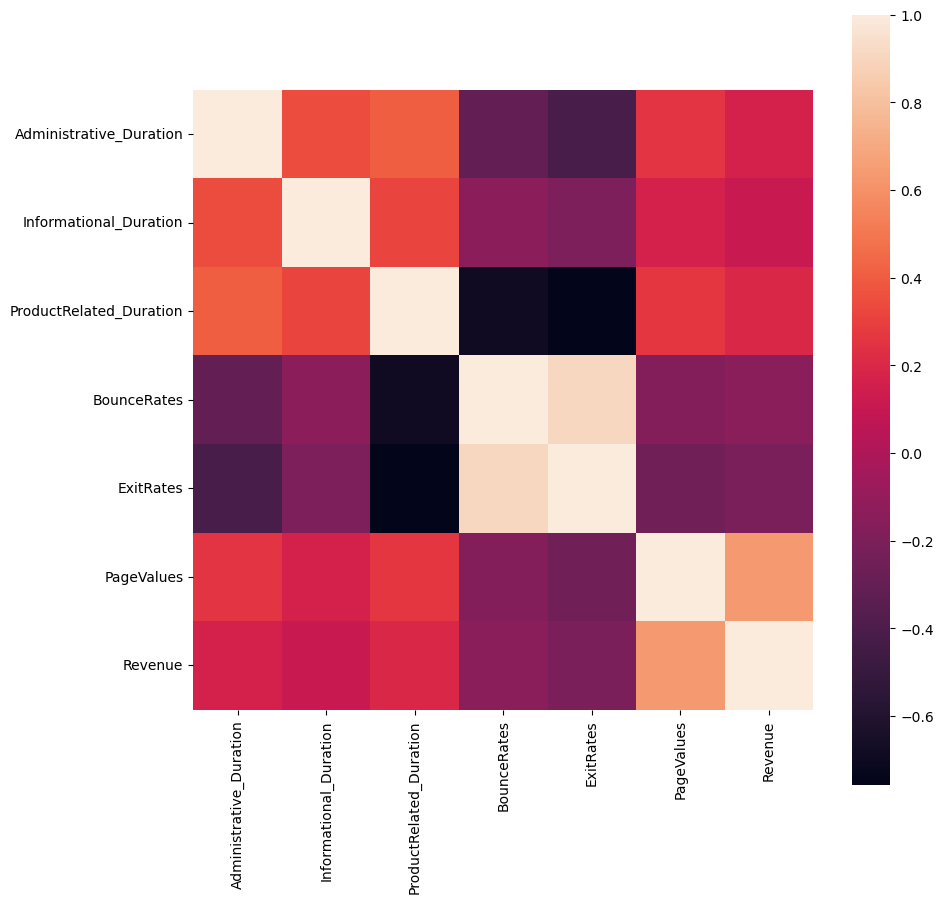

In [17]:
# Plot area
plt.figure(figsize = (10,10))

# Correlation Matrix
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',  
                'ProductRelated_Duration',
                'BounceRates', 
                'ExitRates', 
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)

Visualization of graphs of categorical variables to analyze how the target variable is influenced by them.

<AxesSubplot:title={'center':'Sale or Not'}, xlabel='Revenue', ylabel='count'>

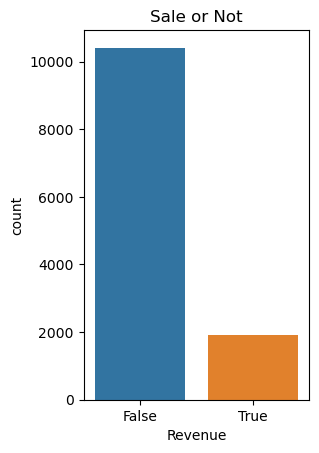

In [18]:
# Countplot Sale or Not
plt.subplot(1,2,2)
plt.title("Sale or Not")
sns.countplot(df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

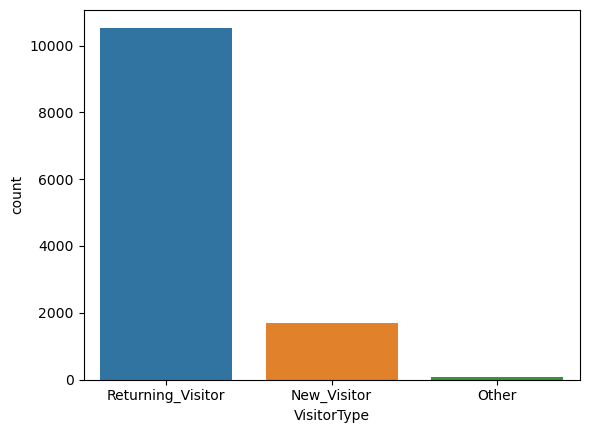

In [19]:
# Countplot Type of Visitor
plt.xlabel("Type of Visitor")
sns.countplot(df['VisitorType'])

<AxesSubplot:xlabel='VisitorType'>

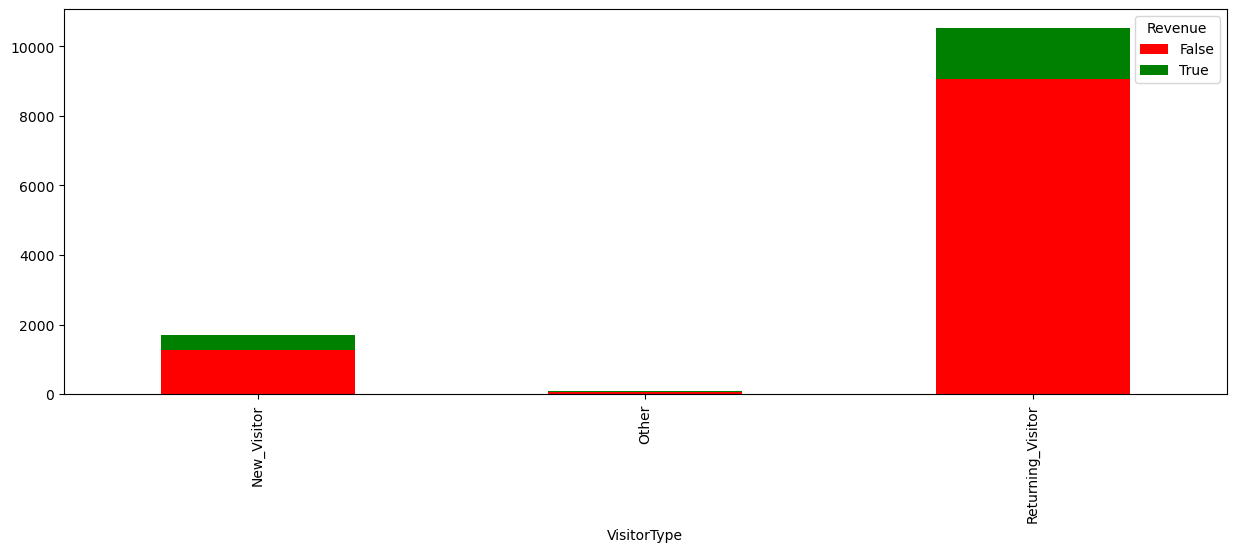

In [20]:
# Stacked Bar Type of Visitor x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

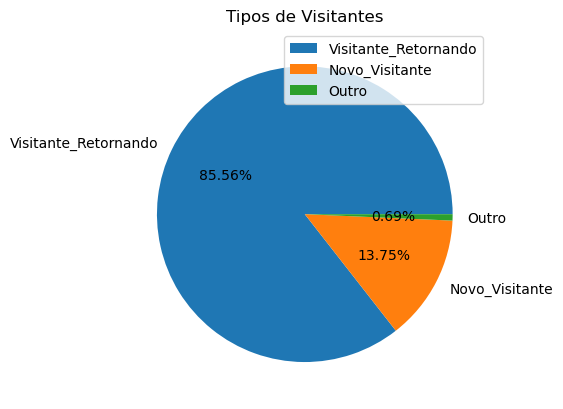

In [21]:
# Pie Chart Visitor Types
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()

<AxesSubplot:title={'center':'Weekend or Not'}, xlabel='Weekend', ylabel='count'>

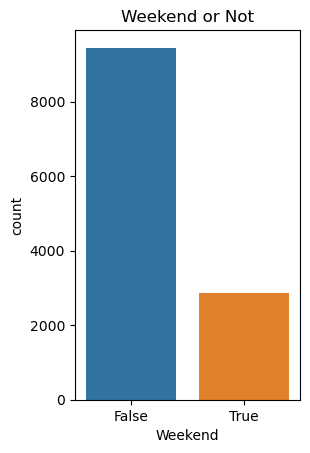

In [22]:
# Weekend Countplot or Not
plt.subplot(1,2,1)
plt.title("Weekend or Not")
sns.countplot(df['Weekend'])

<AxesSubplot:xlabel='Weekend'>

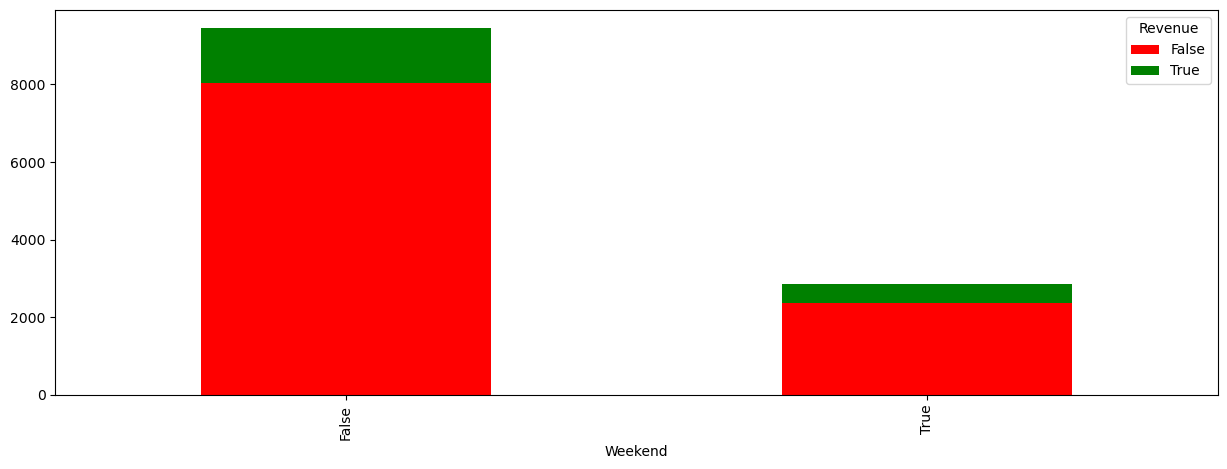

In [23]:
# Stacked Bar Final de Semana x Revenue
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (15, 5), 
                                               color = ['red', 'green'])

<AxesSubplot:title={'center':'Types of Operating Systems'}, xlabel='OperatingSystems', ylabel='count'>

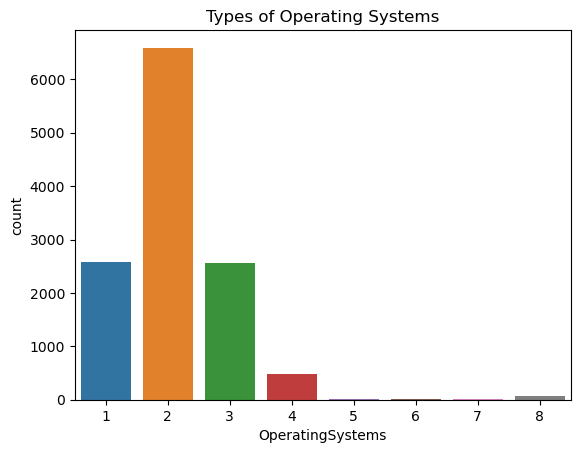

In [24]:
# Countplot Types of Operating Systems
#plt.figure(figsize = (15,6))
plt.title("Types of Operating Systems")
plt.xlabel("Operating System Used")
sns.countplot(df['OperatingSystems'])

<AxesSubplot:xlabel='OperatingSystems'>

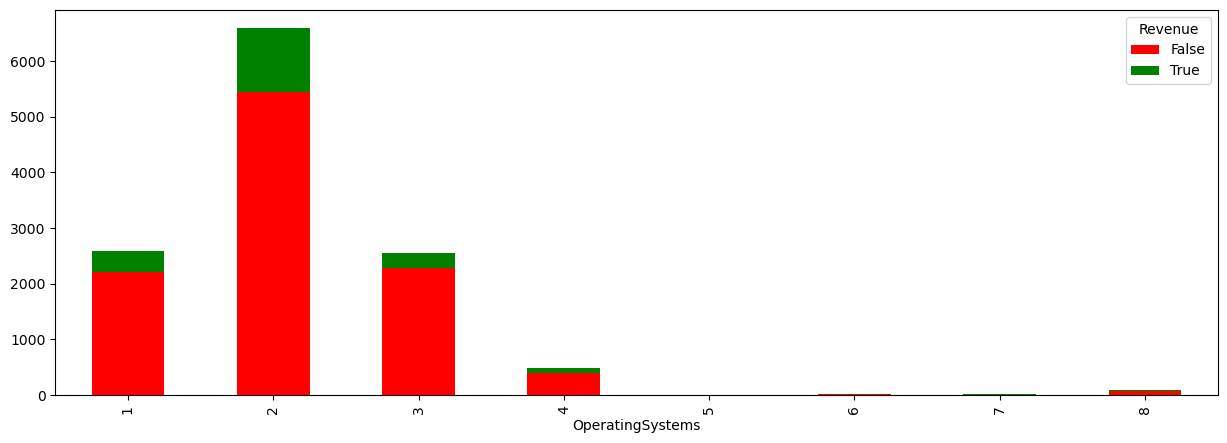

In [25]:
# Stacked Bar Type de SO x Revenue
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (15, 5), 
                                                        color = ['red', 'green'])

<AxesSubplot:title={'center':'Traffic Types'}, xlabel='TrafficType', ylabel='count'>

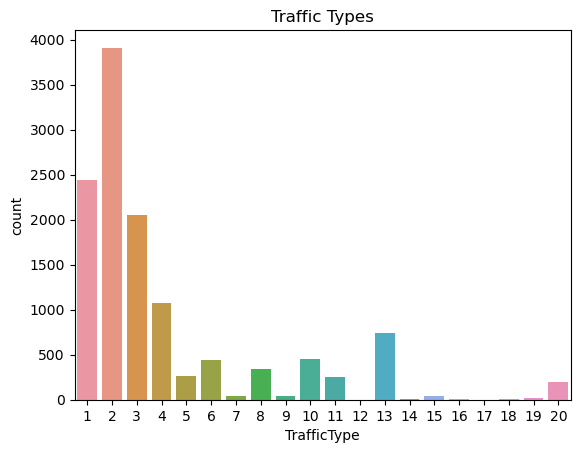

In [26]:
# Countplot Type of Traffic
plt.title("Traffic Types")
plt.xlabel("Traffic Type")
sns.countplot(df['TrafficType'])

<AxesSubplot:xlabel='TrafficType'>

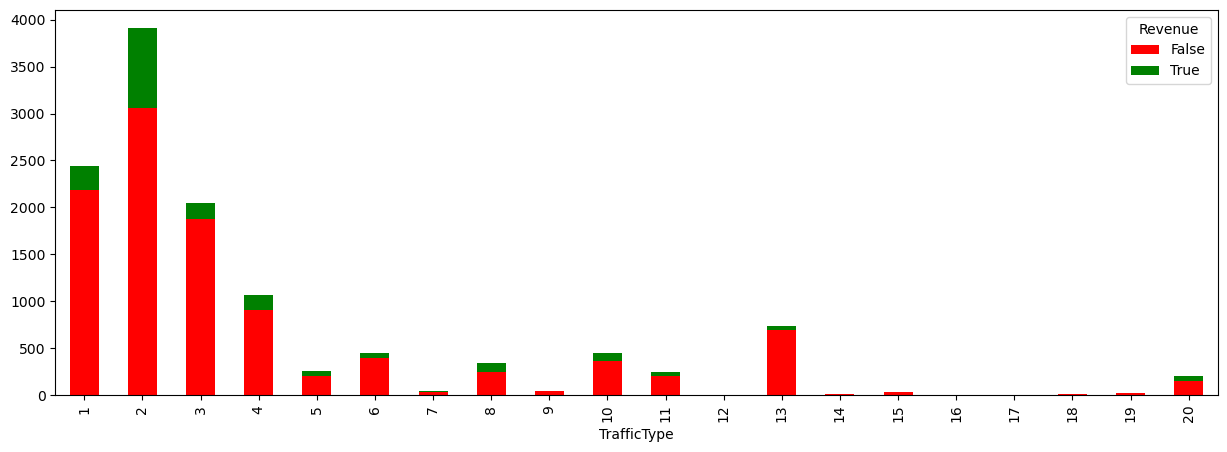

In [27]:
# Stacked Bar Tipos de Tráfego x Revenue
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

## Data Pre-Processing

In [28]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [29]:
# create encoder
lb = LabelEncoder()

df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove valores missing
df_original.dropna(inplace = True)

In [30]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [31]:
# Shape
df_original.shape

(12316, 18)

In [32]:
# Checking if the response variable is balanced
target_count = df_original.Revenue.value_counts()
target_count

False    10408
True      1908
Name: Revenue, dtype: int64

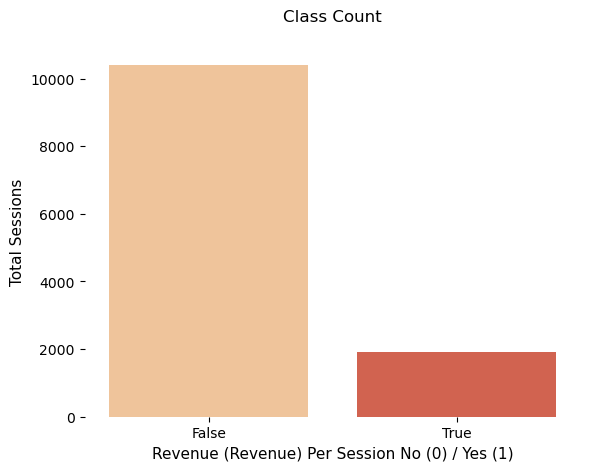

In [33]:
# Plot 
sns.countplot(df_original.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel('Revenue (Revenue) Per Session No (0) / Yes (1)', fontsize = 11)
plt.ylabel('Total Sessions', fontsize = 11)
plt.title('Class Count\n')
plt.show()

In [34]:
import imblearn

In [35]:
# Shape
df_original.shape

(12316, 18)

In [36]:
# Explanatory variables
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [37]:
# target variable
df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Class Balancing - Oversampling

In [38]:
from imblearn.over_sampling import SMOTE

seed = 100

X = df_original.iloc[:, 0:17]  
y = df_original.iloc[:, 17] 

smote_bal = SMOTE(random_state = seed)

X_res, y_res = smote_bal.fit_resample(X, y)

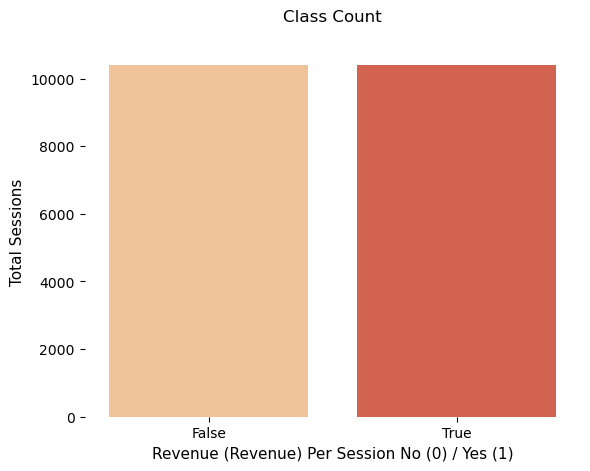

In [39]:
# Plot 
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Revenue (Revenue) Per Session No (0) / Yes (1)', fontsize = 11)
plt.ylabel('Total Sessions', fontsize = 11)
plt.title('Class Count\n')
plt.show()

In [40]:
# Shape of the original data
df_original.shape

(12316, 18)

In [41]:
# Shape of the resampled data
X_res.shape

(20816, 17)

In [42]:
# Shape of the resampled data
y_res.shape

(20816,)

In [43]:
# Adjusting x and y
X = X_res
y = y_res

In [44]:
# Split into Training and Test Data.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelo SVM

### Model with Linear Kernel and Standardized Data

In [45]:
# Standardization
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

In [46]:
X_treino_scaled

array([[ 0.67023596,  0.00746589, -0.4556655 , ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.71405441, -0.53155654, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [ 0.9117153 , -0.18078072, -0.4556655 , ...,  0.57746102,
         0.54253778,  1.44038165],
       ...,
       [-0.21784301,  0.00977669,  1.83111142, ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.50179946,
        -2.06175081, -0.69426044],
       [-0.37088559, -0.29288262,  0.58272764, ..., -0.50179946,
        -0.75960651, -0.69426044]])

In [47]:
X_teste_scaled

array([[-0.74974984, -0.52847418, -0.4556655 , ...,  0.57746102,
        -2.06175081,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       ...,
       [-0.80989566, -0.53903796, -0.4556655 , ...,  0.57746102,
         0.54253778, -0.69426044],
       [ 1.03373541,  1.74922518, -0.4556655 , ..., -0.50179946,
         0.54253778,  1.44038165],
       [ 0.3044991 , -0.28747987,  1.09682136, ..., -0.50179946,
         0.54253778, -0.69426044]])

In [48]:
# Create the model
modelo_v2 = svm.SVC(kernel = 'linear')

In [49]:
# Training
start = time.time()
modelo_v2.fit(X_treino_scaled, y_treino)
end = time.time()
print('Model Training Time:', end - start)

Model Training Time: 7.016260623931885


In [50]:
# Prevision
previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [51]:
# Dictionary of metrics and metadata
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear with Standardized Data',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [52]:
# Print
print("Test Metrics:\n")
SVM_dict_v2

Test Metrics:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear with Standardized Data',
 'Precision': 0.7892902408111534,
 'Recall': 0.8909155937052933,
 'F1 Score': 0.8370295698924732,
 'Acurácia': 0.844675740592474,
 'AUC': 0.8452763926619704}

### Hyperparameter Optimization with Grid Search and Kernel RBF

In [53]:
modelo_v3 = svm.SVC(kernel = 'rbf')

# Values for the grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Hyperparameter grid
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Training
modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Model Training Time with Grid Search:', end - start)

# Accuracy in Training
print(f"Accuracy in Training: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Ideal hyperparameters: {modelo_v3_grid_search_rbf.best_params_}")

Model Training Time with Grid Search: 118.822194814682
Accuracy in Training: 87.41%

Ideal hyperparameters: {'C': 200.0, 'gamma': 0.003}


In [54]:
# Prevision
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [55]:
# Dictionary of metrics and metadata
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF with Standardized Data',
               'Precision':precision_score(previsoes_v3, y_teste),
               'Recall':recall_score(previsoes_v3, y_teste),
               'F1 Score':f1_score(previsoes_v3, y_teste),
               'Acurácia':accuracy_score(previsoes_v3, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v3)}

In [56]:
# Print
print("Test Metrics:\n")
SVM_dict_v3

Test Metrics:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF with Standardized Data',
 'Precision': 0.8361850443599493,
 'Recall': 0.8957909029192125,
 'F1 Score': 0.8649623074401837,
 'Acurácia': 0.8680544435548438,
 'AUC': 0.8684000650741152}

### Hyperparameter Optimization with Grid Search and Polynomial Kernel

In [57]:
modelo_v4 = svm.SVC(kernel = 'poly')

# Values for the grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Hyperparameter grid
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Training
modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print('Model Training Time with Grid Search:', end - start)

# Accuracy in Training
print(f"Accuracy in Training: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Ideal hyperparameters: {modelo_v4_grid_search_poly.best_params_}")

Model Training Time with Grid Search: 90.51934051513672
Accuracy in Training: 86.14%

Ideal hyperparameters: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [58]:
# Prevision
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [59]:
# Dictionary of metrics and metadata
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polynomial with Standardized Data',
               'Precision':precision_score(previsoes_v4, y_teste),
               'Recall':recall_score(previsoes_v4, y_teste),
               'F1 Score':f1_score(previsoes_v4, y_teste),
               'Acurácia':accuracy_score(previsoes_v4, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v4)}

In [60]:
# Print
print("Test Metrics:\n")
SVM_dict_v4

Test Metrics:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polynomial with Standardized Data',
 'Precision': 0.811787072243346,
 'Recall': 0.8902015288394719,
 'F1 Score': 0.8491879350348028,
 'Acurácia': 0.8542834267413931,
 'AUC': 0.8547442968856743}

In [61]:
# Concatenate all dictionaries into a Pandas dataframe
resumo = pd.DataFrame({
                       'SVM_dict_v2':pd.Series(SVM_dict_v2),
                       'SVM_dict_v3':pd.Series(SVM_dict_v3),
                       'SVM_dict_v4':pd.Series(SVM_dict_v4)})

In [62]:
# Print
resumo

,SVM_dict_v2,SVM_dict_v3,SVM_dict_v4
Modelo,SVM,SVM,SVM
Versão,2,3,4
Kernel,Linear with Standardized Data,RBF with Standardized Data,Polynomial with Standardized Data
Precision,0.78929,0.836185,0.811787
Recall,0.890916,0.895791,0.890202
F1 Score,0.83703,0.864962,0.849188
Acurácia,0.844676,0.868054,0.854283
AUC,0.845276,0.8684,0.854744


### Making Predictions with the Trained Model

In [63]:
# New user
novo_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, False]).reshape(1, -1)

In [64]:
novo_x

array([[4.   , 5.56 , 1.   , 3.78 , 2.995, 6.   , 0.69 , 0.7  , 0.69 ,
        0.   , 6.   , 1.   , 1.   , 3.   , 3.   , 2.   , 0.   ]])

In [65]:
# Standardizing the data of the new user
novo_x_scaled = StandardScaler().fit_transform(novo_x)

In [66]:
# Prevision
previsao_novo_x = modelo_v3_grid_search_rbf.predict(novo_x_scaled)

In [67]:
# The result of our model indicates that this user has a purchase intention.
previsao_novo_x

array([ True])

# Fim